In [1]:
import torch.nn as nn
import torch.optim as optim

In [2]:
learning_rate=0.01
reduceLR_factor=0.5
reduceLR_patience=5
weight_decay_rate=0.5
batchSize=64
tuning_type='learning_rate'
optimizer_name='SGD'

In [3]:
# Parameters
learning_rate = 0.14
reduceLR_factor = 0.6
reduceLR_patience = 5
weight_decay_rate = 0


In [4]:
# editable parameters
quesname='q1/'

# batchSize=64
savename='q1/'

# learning_rate=0.01
# reduceLR_factor=0.5
# reduceLR_patience=5

# logfilename=f

# accuracy=0
# placeholder

num_epochs = 1

criterion = nn.CrossEntropyLoss()


def loginfo(converged=False,testnum=1):     
    
    # logging.info(f"\nTest {testnum}")
    # logging.info(f"initial learning rate : {learning_rate:.2f} ")
    # logging.info(f"Accuracy: {accuracy:.2f}%")
    # # logging.info(f"Training Time: {training_time:.2f} seconds")
    # logging.info(f"Number of epochs to converge: {num_epochs:.2f} ")
    logging.basicConfig(filename=f'log.log', level=logging.INFO, format='%(message)s')
    logging.info(f"tuning : {tuning_type}")
    logging.info(  f"Accuracy: {accuracy:.2f}% | epochs: {num_epochs} | initial learning rate: {learning_rate:.2f} | LR factor: {reduceLR_factor} | Patience: {reduceLR_patience} | weight decay rate: {weight_decay_rate} | Batchsize: {batchSize} | optimizer: {optimizer_name} | training time: {round(training_time,1)} sec\n")
    # logging.info(f"reduceLR_factor: {reduceLR_factor:.2f} ")
    # logging.info(f"reduceLR_patience : {reduceLR_patience:.2f} ")

    # logging.info(f"Test Session Finished \n")
  

In [5]:
# Initialisation
import numpy as np
import math
import torch as t
import torch 
import os


# import torch
# import logging

log_dir = '../../log'
os.makedirs(log_dir, exist_ok=True)

log_dir=os.path.join(log_dir, quesname)
os.makedirs(log_dir, exist_ok=True)
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

import matplotlib.pyplot as plt
%matplotlib inline


# logging.basicConfig(filename=logfile, level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')



In [6]:

# part 1 and 2:
# dataset loading:
training_data = datasets.FashionMNIST(
    root="../../data/",
    train=True,
    download=True,
    transform=ToTensor() # Normalisation step
    
)

# note that ToTensor not just converts the image into a tensor but also normalises its intensity in range 0 to 1


test_data = datasets.FashionMNIST(
    root="../../data/",
    train=False,
    download=True,
    transform=ToTensor() # Normalisation step
)

# Create data loaders for training and testing


train_loader = DataLoader(training_data, batch_size=batchSize, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batchSize, shuffle=False)

In [7]:
# part 3:



# builtin classifier:

# Define the model

# model saving
# Define a directory to save models
save_dir = '../../saved_models/'
save_dir=os.path.join(save_dir, savename)

os.makedirs(save_dir, exist_ok=True)

model = nn.Sequential(

    # we need to flatten the input data from 2d tensor into 1d tensor of 784 values (28*28) since data is in form of images
    nn.Flatten(),  # Flatten the input data

    nn.Linear(in_features=784, out_features=10),  # Linear layer   
    # nn.Linear(in_features=784, out_features=batchSize),  # Linear layer   

    nn.BatchNorm1d(10),
    # this normalsises input tensors by scaling and shifting
    # makes mean 0 and variance 1

    # softmax function, or normalized exponential function converts a vector of K real numbers into a probability distribution of K possible outcomes
    nn.Softmax(dim=1)  # Softmax activation

    
)

# Specify the path to the saved checkpoint file
# model_path = '../../saved_models/model_checkpoint.pth'

# tk
model_path = os.path.join(save_dir, 'ignore.pth')

# model_path = os.path.join(save_dir, 'model_checkpoint.pth')

# Check if the file exists before loading
if os.path.exists(model_path):
    # Load the model checkpoint
    checkpoint = torch.load(model_path)

    # Load the model's state_dict
    model.load_state_dict(checkpoint)
    print("Model loaded successfully.")
else:
    print(f"Checkpoint file '{model_path}' not found. Model not loaded.")

# custom made classifier
'''
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()

        # Define the linear layer
        # we used 28*28 input and 10 labels because we are working with MNIST database
        self.fc = nn.Linear(28 * 28, 10)  # 28*28 input features, 10 output classes
        
        # Define an activation function (e.g., softmax for classification)

        # softmax function, or normalized exponential function converts a vector of K real numbers into a probability distribution of K possible outcomes
        self.softmax = nn.Softmax(dim=1)

    #IMPORTANT the name 'forward' is not arbitrary; it's a convention in PyTorch, and this method is automatically called when we pass data through our model.
    def forward(self, x):

        # we need to flatten the input data from 2d tensor into 1d tensor of 784 values (28*28) since data is in form of images
        x = x.view(x.size(0), -1)  # Flatten the input tensor

        x = self.fc(x)  # Apply the linear transformation
        x = self.softmax(x) # Apply the activation function
        return x
'''
print('model created')

Checkpoint file '../../saved_models/q1/ignore.pth' not found. Model not loaded.
model created


In [8]:
print("Model structure before training: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure before training:  Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Softmax(dim=1)
) 


Layer: 1.weight | Size: torch.Size([10, 784]) | Values : tensor([[ 0.0037, -0.0076,  0.0141,  ..., -0.0269, -0.0048, -0.0292],
        [ 0.0137, -0.0096, -0.0099,  ...,  0.0156,  0.0165,  0.0215]],
       grad_fn=<SliceBackward0>) 

Layer: 1.bias | Size: torch.Size([10]) | Values : tensor([0.0271, 0.0043], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([10]) | Values : tensor([1., 1.], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([10]) | Values : tensor([0., 0.], grad_fn=<SliceBackward0>) 



In [9]:
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define the optimizer based on the provided name, learning rate, and weight decay rate
if optimizer_name == "SGD":
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay_rate)
elif optimizer_name == "Adam":
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay_rate)
elif optimizer_name == "RMSprop":
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay_rate)
else:
    raise ValueError("Invalid optimizer name")
# type(optimizer).__name__

In [10]:
# part 4:

# Define the loss function


# import torch.optim as optim
# Define the optimizer (e.g., SGD)



# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

'''
about SGD: Stochastic Gradient Descent:
basically it performs seqeuntial updation of paramters after each epoch, using formula :
parameter = parameter - learning_rate * gradient

'''
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=reduceLR_factor, patience=reduceLR_patience, verbose=True)

'''
here mode = min : means reduce (instead of increase) LR when error plateaus

patience = how many epochs to wait before reducing LR
'''

print('part 4 done')



part 4 done


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1/1] - Loss: 1.7440, Learning Rate: 0.140000
Training complete
time taken to train :  11.49685287475586
time per epoch :  11.5


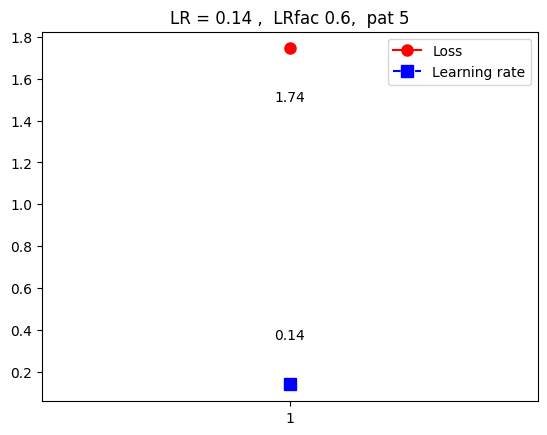

In [11]:
# part 5
# Define the number of training epochs


import time
t1=time.time()
# Training loop
fig, ax1 = plt.subplots()
# running_loss_data=[]
converged=False
avg_loss_data=[]
LR_data=[]
epoch_data=[]
# plt.ion()
# epoch_data=np.arange(1, num_epochs+1)
# num_epochs=10
plt.title(f'LR = {learning_rate} ,  LRfac {reduceLR_factor},  pat {reduceLR_patience}')
# plt.xlim(0, num_epochs+1)

plt.legend()
try:
    
    for epoch in range(num_epochs):
        # Set the model in training mode
        model.train()
        
        running_loss = 0.0
        
        # Iterate over the training dataset
        for inputs, labels in train_loader:  # Replace train_loader with your data loader
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute the loss
            loss = criterion(outputs, labels)
            
            # Backpropagation
            loss.backward()
            
            # Update the model's parameters
            optimizer.step()
            
            # Track the running loss
            running_loss += loss.item()
        
        # Calculate and print the average loss for this epoch
        average_loss = running_loss / len(train_loader)



        current_lr = optimizer.param_groups[0]['lr']
        
        # running_loss_data.append(running_loss)
        avg_loss_data.append(average_loss)
        epoch_data.append(epoch+1)
        LR_data.append(current_lr)

        # ax1.clear()
    
        # Plot the data for this epoch
        # ax1.plot(epoch_data, avg_loss_data, label='Average Loss', color='blue')
        # ax1.set_xlabel('Epoch')
        # ax1.set_ylabel('Average Loss', color='blue')
        
        # ax2 = ax1.twinx()
        # ax2.plot(epoch_data, LR_data, label='Learning Rate', color='red')
        # ax2.set_ylabel('Learning Rate', color='red')
        
        # # Display the updated plot for this epoch
        # plt.draw()
        # plt.pause(0.01)  # Adjust the pause duration as needed
        
        

        # Update the learning rate scheduler with the training loss
        scheduler.step(average_loss)
        
        # ax1.xticks(epoch_data,epoch_data)
        # i=epoch
        # ax1.text(epoch_data[i], avg_loss_data[i]-0.2, f'{round(avg_loss_data[i],2)}', ha='center', va='top')

        # ax1.clear()
    
        # # Plot the data for this epoch
        # ax1.plot(epoch_data, avg_loss_data, label='Average Loss', color='blue')
        # ax1.set_xlabel('Epoch')
        # ax1.set_ylabel('Average Loss', color='blue')
        
        # ax2 = ax1.twinx()
        # ax2.plot(epoch_data, LR_data, label='Learning Rate', color='red')
        # ax2.set_ylabel('Learning Rate', color='red')
        
        # # Display the updated plot for this epoch
        # plt.draw()
        # plt.pause(0.01)

        # plt.clear()
        # plt.xticks(epoch_data,epoch_data)
        # plt.title(f'LR = {learning_rate} ,  LRfac {reduceLR_factor},  pat {reduceLR_patience}')
        # plt.plot(epoch_data,avg_loss_data, marker='o', linestyle='-', markersize=8, label='Loss', color='red')
        # plt.plot(epoch_data,LR_data,  marker='s', linestyle='--', markersize=8, label='Learning rate', color='blue')
        # plt.xticks(epoch_data,epoch_data)
        # # i=epoch

        # for i in range(0,epoch+1):
        #     plt.text(epoch_data[i], avg_loss_data[i]-0.2, f'{round(avg_loss_data[i],5)}', ha='center', va='top')
            
        #     plt.text(epoch_data[i], LR_data[i]+0.2, f'{LR_data[i]}', ha='center', va='bottom')
        # plt.show()
        # plt.draw()
        # plt.pause(0.001)
        
        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {average_loss:.4f}, Learning Rate: {current_lr:.6f}")
        if current_lr==0:
            converged=True
            print("training stopping")
            num_epochs=epoch+1
            raise KeyboardInterrupt

        
        # print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {average_loss:.4f}")
        
except KeyboardInterrupt:
    print("\n ---------training interrupted----------- \n")


# plt.ioff()
# plt.show()


print("Training complete")
t2=time.time()
training_time=t2-t1
print('time taken to train : ',training_time)
print('time per epoch : ',round(training_time/num_epochs,2))

# pltfolder=f"{learning_rate}|{num_epochs}|{reduceLR_factor}|{reduceLR_patience}"

# Add labels for each data point (y-values)
for i in range(num_epochs):
    plt.text(epoch_data[i], avg_loss_data[i]-0.2, f'{round(avg_loss_data[i],2)}', ha='center', va='top')
    plt.text(epoch_data[i], LR_data[i]+0.2, f'{LR_data[i]}', ha='center', va='bottom')
epoch_data=np.arange(1, num_epochs+1)
plt.plot(epoch_data,avg_loss_data, marker='o', linestyle='-', markersize=8, label='Loss', color='red')
plt.plot(epoch_data,LR_data,  marker='s', linestyle='--', markersize=8, label='Learning rate', color='blue')
# plt.title(tunefilename)
plt.title(f'LR = {learning_rate} ,  LRfac {reduceLR_factor},  pat {reduceLR_patience}')
plt.xlim(0, num_epochs+1)
plt.xticks(epoch_data,epoch_data)

plt.legend()
plt.savefig('')
# plt.savefig()
# plt.savefig('pat{reduceLR_patience}, LRfac{reduceLR_factor},LR{learning_rate}')
# # print(plotfile)
# plt.xticks(epoch_data,epoch_data)
# plt.title(f'LR = {learning_rate} ,  LRfac {reduceLR_factor},  pat {reduceLR_patience}')
# plt.plot(epoch_data,avg_loss_data, marker='o', linestyle='-', markersize=8, label='Loss', color='red')
# plt.plot(epoch_data,LR_data,  marker='s', linestyle='--', markersize=8, label='Learning rate', color='blue')
# plt.xticks(epoch_data,epoch_data)
# # i=epoch

# for i in range(0,num_epochs):
#     plt.text(epoch_data[i], avg_loss_data[i]-0.2, f'{round(avg_loss_data[i],5)}', ha='center', va='top')
    
#     plt.text(epoch_data[i], LR_data[i]+0.2, f'{LR_data[i]}', ha='center', va='bottom')
# plt.show()



# Save the model checkpoint to the specified directory
# model_path = os.path.join(save_dir, 'model_checkpoint.pth')

# tk
# torch.save(model.state_dict(), model_path)


In [12]:
print("Model structure after training: ", model, "\n\n")
print("jere")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure after training:  Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Softmax(dim=1)
) 


jere
Layer: 1.weight | Size: torch.Size([10, 784]) | Values : tensor([[ 0.0037, -0.0076,  0.0143,  ..., -0.0518, -0.0143, -0.0305],
        [ 0.0137, -0.0095, -0.0097,  ...,  0.0061,  0.0155,  0.0215]],
       grad_fn=<SliceBackward0>) 

Layer: 1.bias | Size: torch.Size([10]) | Values : tensor([0.0271, 0.0043], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([10]) | Values : tensor([2.4629, 2.5074], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([10]) | Values : tensor([0.0561, 0.0213], grad_fn=<SliceBackward0>) 



In [13]:
# part 6 :
# testing 

# Set the model to evaluation mode
model.eval()

correct_predictions = 0
total_predictions = 0

# Iterate over the testing dataset

k=0
for inputs, labels in test_loader:  # Use your test data loader
    k+=1
    # Forward pass to obtain predictions
    outputs = model(inputs)
    
    # Get the predicted class for each example in the batch
    _, predicted = torch.max(outputs, dim=1)
    
    # Count correct predictions in this batch
    batch_correct_predictions = (predicted == labels).sum().item()
    correct_predictions += batch_correct_predictions
    
    # Count total predictions in this batch

    batch_total_predictions = labels.size(0)
    total_predictions += batch_total_predictions 

    # Print the running accuracy for this batch
    # Update running accuracy
    batch_accuracy=batch_correct_predictions/batch_total_predictions * 100.0
    print(f"Accuracy on this batch {batch_accuracy:.2f}%")

    accuracy = (correct_predictions / total_predictions) * 100.0
    print(f"Accuracy till now:  testing dataset: {accuracy:.2f}%")

print()
print("number of tests:",k)

# Calculate the accuracy
accuracy = (correct_predictions / total_predictions) * 100.0
print(f"Accuracy on the testing dataset: {accuracy:.2f}%")
print('time taken to train : ',training_time)


# saving accuracy


  

# tk
# log_dir="../../log/"
# tunefilename=f'Accuracy {accuracy} ,pat{reduceLR_patience}, LRfac{reduceLR_factor},LR{learning_rate}'
# plot_dir=log_dir
# os.makedirs(plot_dir, exist_ok=True)
# logfilename=tunefilename+'.log'
# plotfilename=tunefilename+'.png'
# plotfilename=f'pat{reduceLR_patience}, LRfac{reduceLR_factor},LR{learning_rate}.png'
# plotfile=os.path.join(log_dir, plotfilename)
# logfile=os.path.join(log_dir, logfilename)


# tunefilename=f'patience={reduceLR_patience}_LR_factor={reduceLR_factor}'

import logging

# print(logfile)
print(accuracy)
# logging.basicConfig(filename=f'{accuracy}.log', level=logging.INFO, format='%(message)s')
# logging.info(f"initial learning rate : {learning_rate:.2f} | Accuracy: {accuracy:.2f}% | {num_epochs} epochs | converged : {converged}\n")
# logging.info("ererer")
loginfo(accuracy)
logging.shutdown()



# plt.show()
# loginfo(converged,accuracy)
print("data saved")



Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 79.69%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 83.59%
Accuracy on this batch 90.62%
Accuracy till now:  testing dataset: 85.94%


Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 85.16%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 84.69%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 84.64%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 85.04%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 84.38%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 83.85%
Accuracy on this batch 73.44%
Accuracy till now:  testing dataset: 82.81%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 82.95%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 82.81%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 83.17%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 83.48%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 83.33%
Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 82.81%
Accuracy on this batch 85.94%
Accuracy

Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 82.62%
Accuracy on this batch 76.56%
Accuracy till now:  testing dataset: 82.39%
Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 82.52%
Accuracy on this batch 76.56%
Accuracy till now:  testing dataset: 82.31%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 82.33%
Accuracy on this batch 95.31%
Accuracy till now:  testing dataset: 82.76%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 82.66%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 82.62%
Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 82.39%
Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 82.49%
Accuracy on this batch 93.75%
Accuracy till now:  testing dataset: 82.81%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 82.86%


Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 82.85%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 82.81%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 82.85%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 82.77%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 82.70%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 82.70%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 82.70%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 82.71%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 82.71%
Accuracy on this batch 68.75%
Accuracy till now:  testing dataset: 82.40%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 82.35%
Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 82.42%
Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 82.27%
Accuracy on this batch 81.25%
Accuracy

Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 82.02%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 82.00%


Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 81.88%
Accuracy on this batch 76.56%
Accuracy till now:  testing dataset: 81.78%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.80%


Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 81.84%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 81.89%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 81.85%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.84%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 81.80%
Accuracy on this batch 92.19%
Accuracy till now:  testing dataset: 81.97%
Accuracy on this batch 71.88%
Accuracy till now:  testing dataset: 81.81%
Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 81.71%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 81.75%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 81.72%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 81.80%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.75%
Accuracy on this batch 92.19%
Accuracy till now:  testing dataset: 81.90%
Accuracy on this batch 82.81%
Accuracy

Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 81.78%
Accuracy on this batch 70.31%
Accuracy till now:  testing dataset: 81.64%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.60%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.61%


Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.63%
Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 81.68%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.69%
Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 81.61%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.61%
Accuracy on this batch 73.44%
Accuracy till now:  testing dataset: 81.52%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 81.50%
Accuracy on this batch 76.56%
Accuracy till now:  testing dataset: 81.44%


Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.46%
Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 81.50%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 81.54%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.53%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 81.56%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.53%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.49%


Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 81.54%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 81.52%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.48%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.45%
Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 81.39%
Accuracy on this batch 76.56%
Accuracy till now:  testing dataset: 81.34%
Accuracy on this batch 79.69%
Accuracy till now:  testing dataset: 81.33%


Accuracy on this batch 67.19%
Accuracy till now:  testing dataset: 81.19%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 81.25%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.26%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 81.29%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.31%
Accuracy on this batch 73.44%
Accuracy till now:  testing dataset: 81.24%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.24%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.24%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.24%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.25%
Accuracy on this batch 76.56%
Accuracy till now:  testing dataset: 81.21%
Accuracy on this batch 90.62%
Accuracy till now:  testing dataset: 81.29%
Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 81.33%
Accuracy on this batch 79.69%
Accuracy

Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.31%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.31%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.29%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.29%
Accuracy on this batch 73.44%
Accuracy till now:  testing dataset: 81.23%
Accuracy on this batch 76.56%
Accuracy till now:  testing dataset: 81.19%
Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 81.23%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.24%
Accuracy on this batch 85.94%
Accuracy till now:  testing dataset: 81.27%
Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 81.23%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.24%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 81.29%
Accuracy on this batch 84.38%
Accuracy till now:  testing dataset: 81.31%
Accuracy on this batch 71.88%
Accuracy

Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.05%
Accuracy on this batch 75.00%
Accuracy till now:  testing dataset: 81.01%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 81.05%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.03%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.01%
Accuracy on this batch 82.81%
Accuracy till now:  testing dataset: 81.02%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.02%
Accuracy on this batch 87.50%
Accuracy till now:  testing dataset: 81.07%
Accuracy on this batch 89.06%
Accuracy till now:  testing dataset: 81.12%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.12%
Accuracy on this batch 78.12%
Accuracy till now:  testing dataset: 81.10%
Accuracy on this batch 81.25%
Accuracy till now:  testing dataset: 81.10%

number of tests: 157
Accuracy on the testing dataset: 81.10%
time taken to train :  11.49685287475586
81.100000